In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()

In [13]:
print(data.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [14]:
# Define the specific categories or newsgroups that you want to include in your dataset. Each category corresponds to a different topic, such as "comp.graphics" or "sci.med."
categories = ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']

# This line fetches the training subset of the 20 newsgroups dataset.
train = fetch_20newsgroups(subset='train', categories=categories)

# This line fetches the test subset of the dataset for the specified categories.
test = fetch_20newsgroups(subset='test', categories=categories)

In [20]:
print(len(test.data))
print(len(train.data))

# print(train.data[5])
# print(test.data[5])

7532
11314


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# This line creates a machine learning pipeline called model that consists of two sequential steps:
# Step 1: TfidfVectorizer(): This step represents the TF-IDF vectorization of the text data. It converts a collection of raw documents to a matrix of TF-IDF features.
# Step 2: MultinomialNB(): This step represents the Multinomial Naive Bayes classifier. It is the classifier that will be trained and used for making predictions.
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [22]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

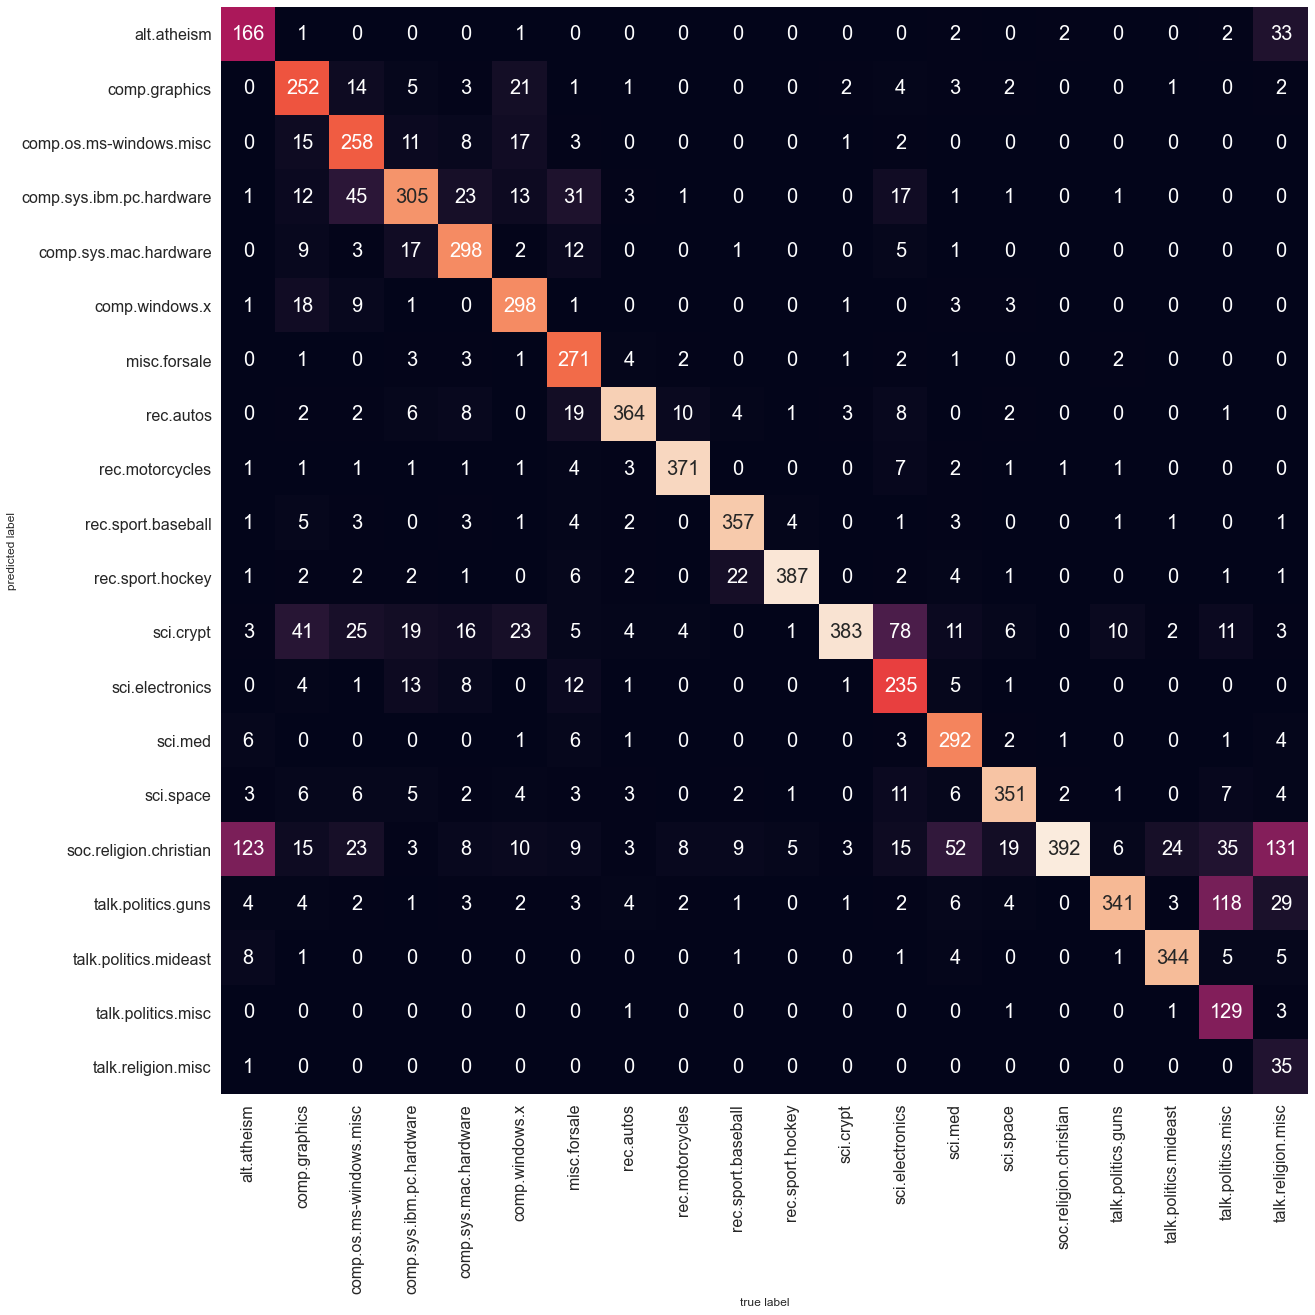

In [47]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
plt.figure(figsize=(20, 20))
# mat.T: This represents the matrix (presumably a confusion matrix) that you want to visualize. The .T transposes the matrix to ensure that the target names are displayed on the correct axes.
# square=True: This parameter ensures that the heatmap has square cells.
# annot=True: This adds numerical annotations (the actual values) to each cell of the heatmap.
# fmt='d': This specifies the format for the annotations as integers ('d' stands for decimal).
# cbar=False: This disables the color bar on the side of the heatmap.
# xticklabels=train.target_names, yticklabels=train.target_names: These parameters set the tick labels on the x and y axes to the target names from the training data.
# annot_kws=font size of number inside the matrix
heatmap = sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, annot_kws={"fontsize": 20},
            xticklabels=train.target_names, yticklabels=train.target_names)
# Set_xticklabels and set_yticklabels are used to set the font size of the x-axis and y-axis tick labels.
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=16)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=16)

plt.xlabel('true label')
plt.ylabel('predicted label');


In [24]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [26]:
predict_category('Sending load to International Space Station ISS')

'sci.space'

In [27]:
predict_category('Suzuki Hayabusa is a very fast motorcycle')

'rec.motorcycles'

In [28]:
predict_category('President of India')

'talk.politics.misc'